In [ ]:
# PASO 1: Librerías y configuración


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from gc import collect
from warnings import filterwarnings

filterwarnings('ignore')
collect()

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (10, 6)})

class color:
    GREEN = '\033[92m'
    RED = '\033[91m'
    BLUE = '\033[94m'
    YELLOW = '\033[93m'
    END = '\033[0m'

print(f"{color.GREEN}✔ Librerías importadas y configuradas correctamente.{color.END}")


✔ Librerías importadas y configuradas correctamente.


In [ ]:
# PASO 2: Carga del dataset


In [2]:
import pandas as pd

ruta_archivo = r'C:\Users\seyer\OneDrive\Escritorio\Felicidad\2019.csv'

try:
    df = pd.read_csv(ruta_archivo)
    print(f"{color.GREEN}✔ Dataset cargado correctamente.{color.END}")
except FileNotFoundError:
    print(f"{color.RED}❌ Archivo no encontrado, verifica la ruta.{color.END}")

✔ Dataset cargado correctamente.


In [ ]:
# PASO 3: Resumen de atributos


In [3]:

print(f"{color.BLUE}Primeras filas del dataset:{color.END}")
display(df.head())

print(f"{color.BLUE}Información del dataset:{color.END}")
df.info()

print(f"{color.BLUE}Descripción estadística rápida:{color.END}")
display(df.describe().T)


Primeras filas del dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
Descripción estadística rápida:


,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [ ]:
# PASO 4: Manejo de valores perdidos


Valores perdidos por columna:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


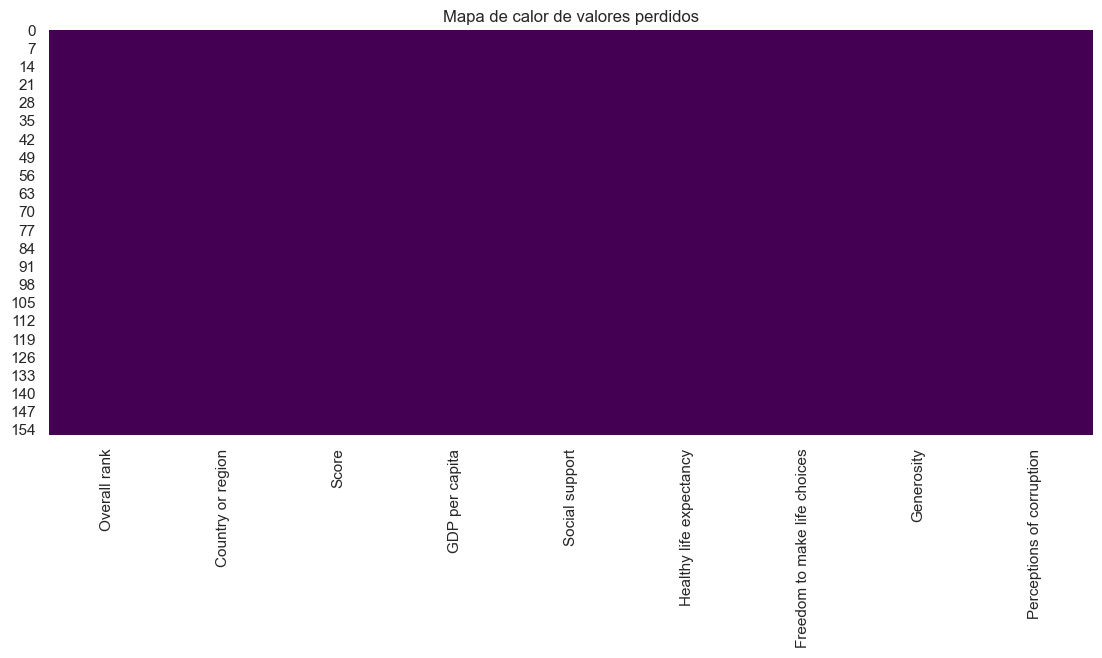

In [4]:

print(f"{color.BLUE}Valores perdidos por columna:{color.END}")
print(df.isnull().sum())

plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores perdidos')
plt.show()


In [ ]:
# PASO 5: Valores duplicados


In [5]:

duplicates = df.duplicated().sum()
print(f"{color.BLUE}El dataset tiene {color.RED}{duplicates}{color.END}{color.BLUE} registros duplicados.{color.END}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"{color.GREEN}✔ Duplicados eliminados.{color.END}")
else:
    print(f"{color.GREEN}✔ No se encontraron duplicados.{color.END}")


El dataset tiene 0 registros duplicados.
✔ No se encontraron duplicados.


In [ ]:
# PASO 6: Estadísticas detalladas


In [7]:

numeric_df = df.select_dtypes(include=['number'])
stats_df = pd.DataFrame()

stats_df['Mean'] = numeric_df.mean()
stats_df['Median'] = numeric_df.median()
stats_df['Mode'] = numeric_df.mode().iloc[0]
stats_df['Std'] = numeric_df.std()
stats_df['Variance'] = numeric_df.var()
stats_df['Min'] = numeric_df.min()
stats_df['Max'] = numeric_df.max()
stats_df['Skewness'] = numeric_df.skew()
stats_df['Kurtosis'] = numeric_df.kurt()

display(stats_df.T.style.background_gradient(cmap='Blues').format("{:.2f}"))

print(f"{color.GREEN}✔ Estadísticas generadas correctamente.{color.END}")


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Mean,78.50,5.41,0.91,1.21,0.73,0.39,0.18,0.11
Median,78.50,5.38,0.96,1.27,0.79,0.42,0.18,0.09
Mode,1.00,5.21,0.96,1.47,0.81,0.50,0.15,0.03
Std,45.18,1.11,0.40,0.30,0.24,0.14,0.10,0.09
Variance,2041.00,1.24,0.16,0.09,0.06,0.02,0.01,0.01
Min,1.00,2.85,0.00,0.00,0.00,0.00,0.00,0.00
Max,156.00,7.77,1.68,1.62,1.14,0.63,0.57,0.45
Skewness,0.00,0.01,-0.39,-1.13,-0.61,-0.69,0.75,1.65
Kurtosis,-1.20,-0.61,-0.77,1.23,-0.30,-0.07,1.17,2.42


✔ Estadísticas generadas correctamente.


In [ ]:
#PASO 7: Exploratory Data Analysis (EDA) general con visualizaciones

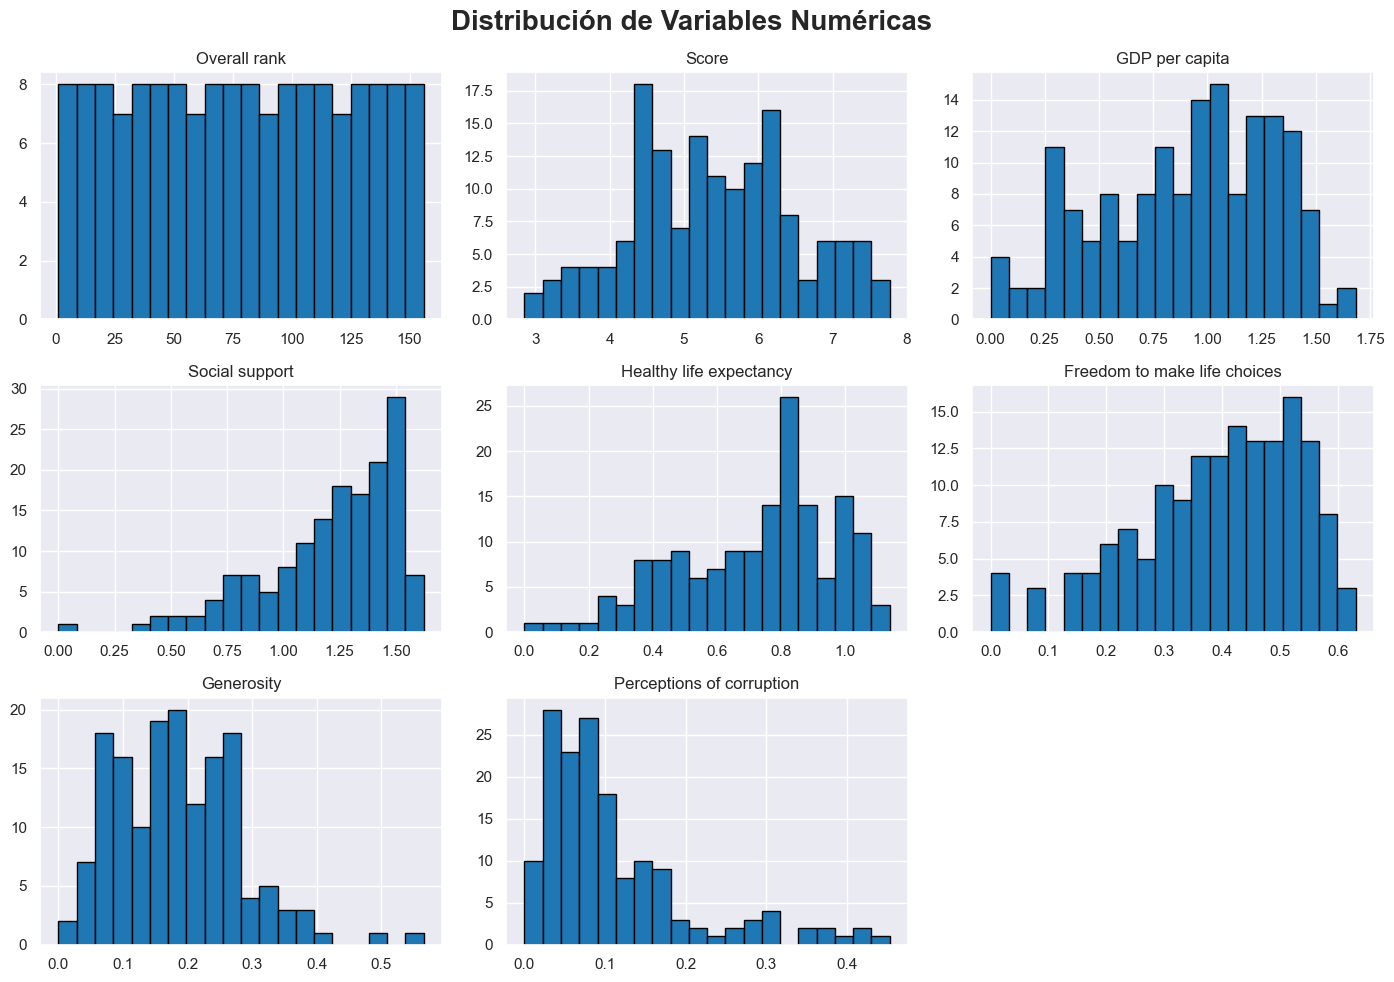

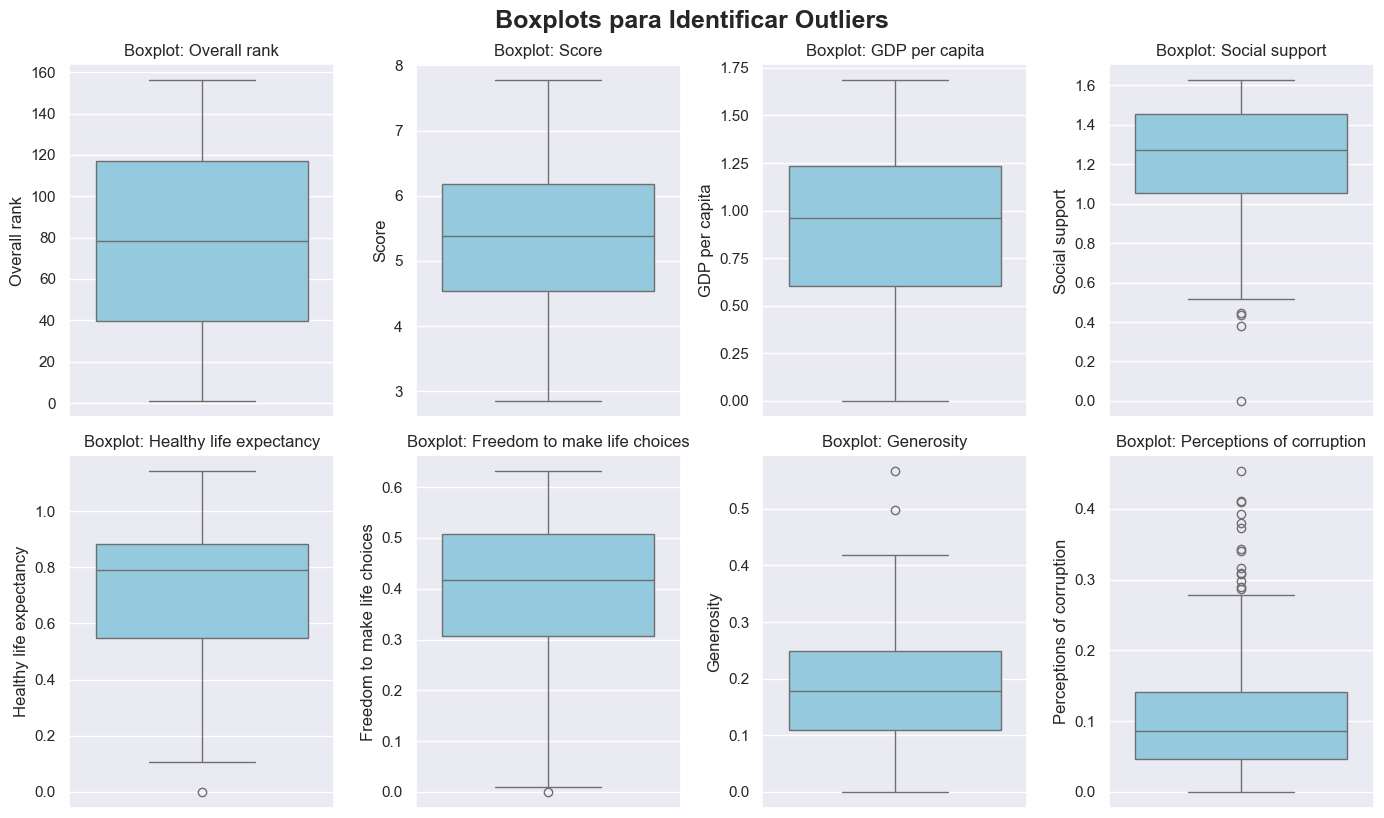

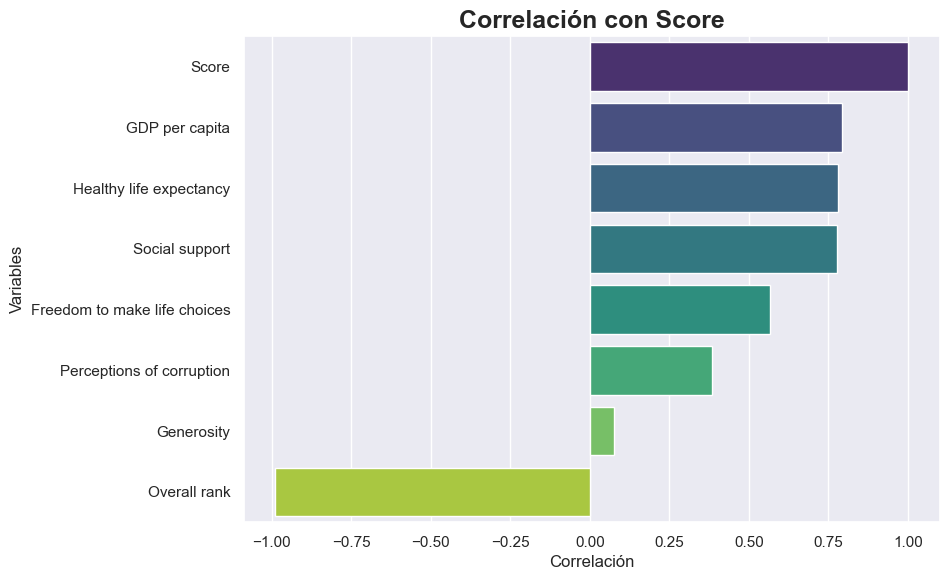

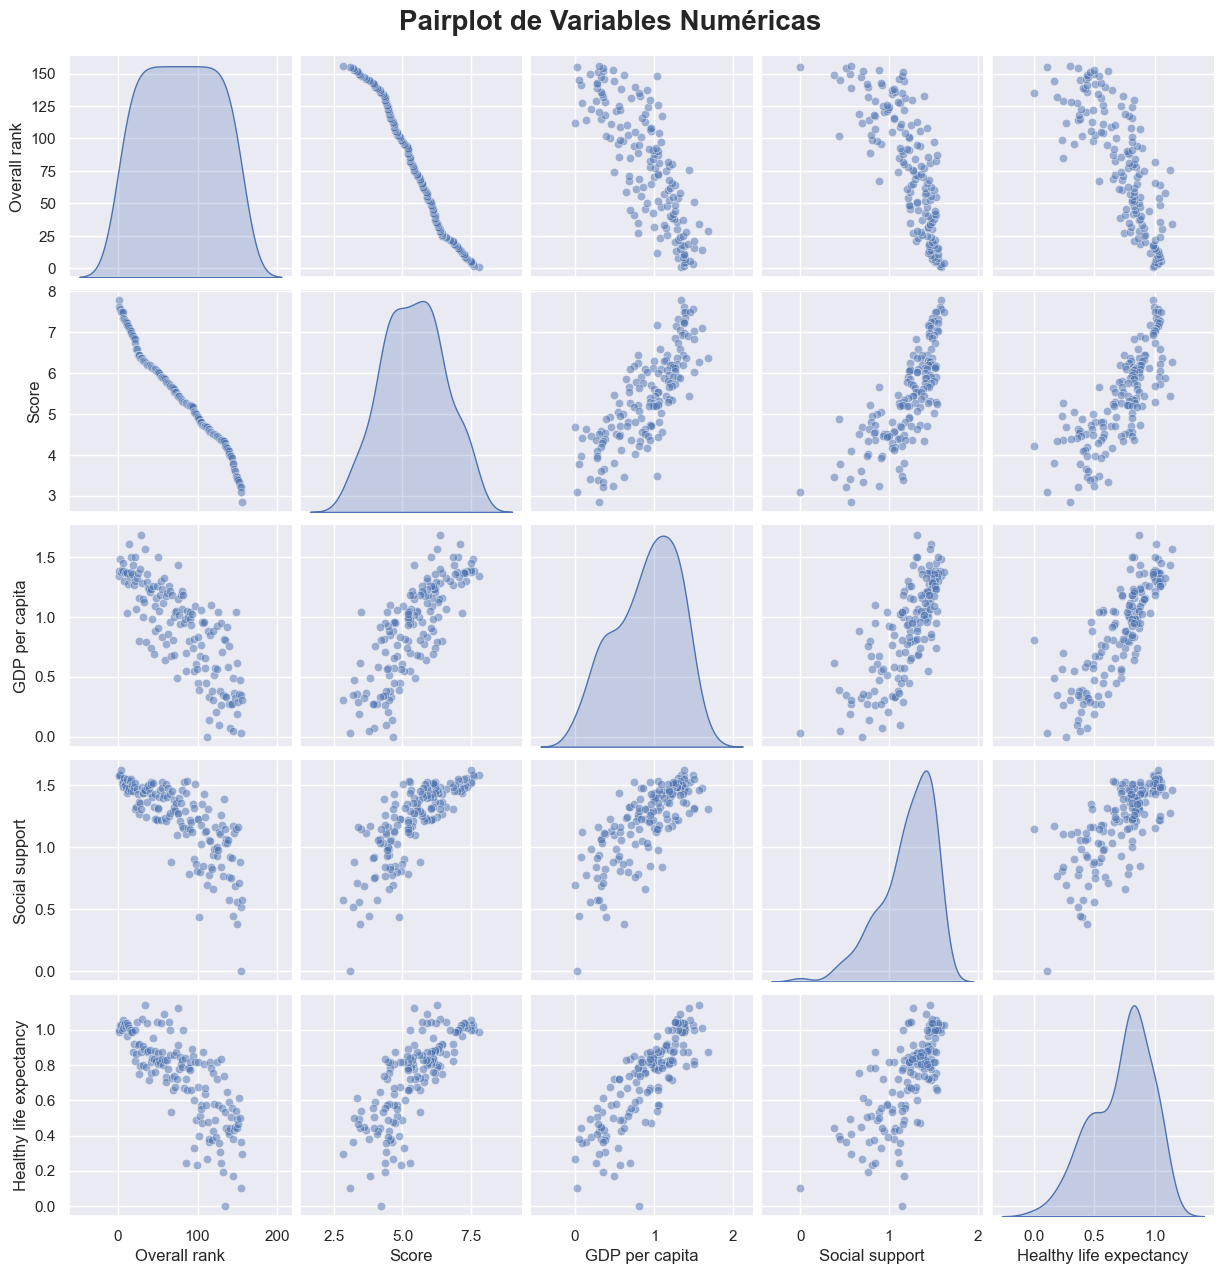

✔ PASO 7 (EDA visual) completado correctamente.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (12, 8)})

# -------------------------------------
# Distribuciones: Histograma + KDE
numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols].hist(figsize=(14, 10), bins=20, edgecolor='black', color='#1f77b4')
plt.suptitle('Distribución de Variables Numéricas', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# -------------------------------------
# Boxplots para identificar outliers
plt.figure(figsize=(14, 8))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(2, int(np.ceil(len(numeric_cols)/2)), idx)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}', fontsize=12)

plt.tight_layout()
plt.suptitle('Boxplots para Identificar Outliers', fontsize=18, fontweight='bold', y=1.02)
plt.show()

# -------------------------------------
# Correlación con Happiness Score (sin columnas no numéricas)
# Usar df[numeric_cols] para evitar columnas tipo object

# Verificar columna de felicidad
if 'Score' in df.columns:
    happiness_col = 'Score'
elif 'Happiness Score' in df.columns:
    happiness_col = 'Happiness Score'
elif 'Happiness.Rank' in df.columns:
    happiness_col = 'Happiness.Rank'
else:
    happiness_col = numeric_cols[0]  # usa la primera columna numérica como referencia

# Calcular correlaciones solo de columnas numéricas
correlations = df[numeric_cols].corr()[happiness_col].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title(f'Correlación con {happiness_col}', fontsize=18, fontweight='bold')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.show()

# -------------------------------------
# Pairplot para relaciones generales
# Usar máximo 5 columnas para evitar sobrecarga

if len(numeric_cols) > 5:
    cols_for_pairplot = numeric_cols[:5]
else:
    cols_for_pairplot = numeric_cols

sns.pairplot(df[cols_for_pairplot], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot de Variables Numéricas', fontsize=20, fontweight='bold', y=1.02)
plt.show()

print(f"{color.GREEN}✔ PASO 7 (EDA visual) completado correctamente.{color.END}")


In [ ]:
#PASO 8: Análisis Univariado Detallado


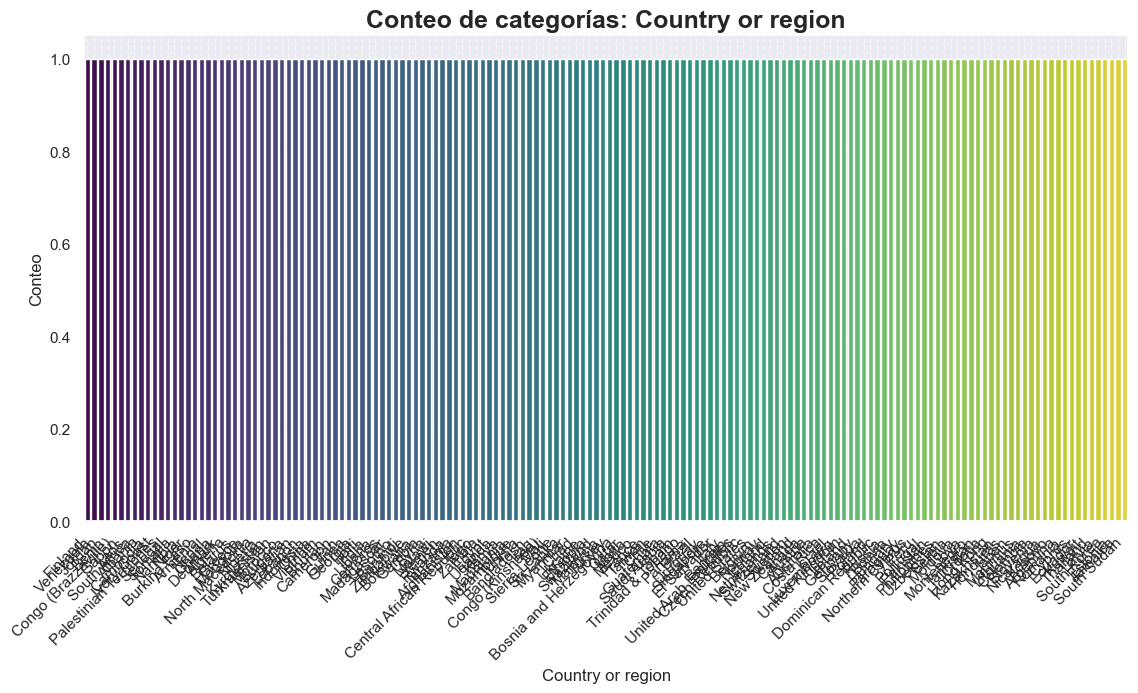

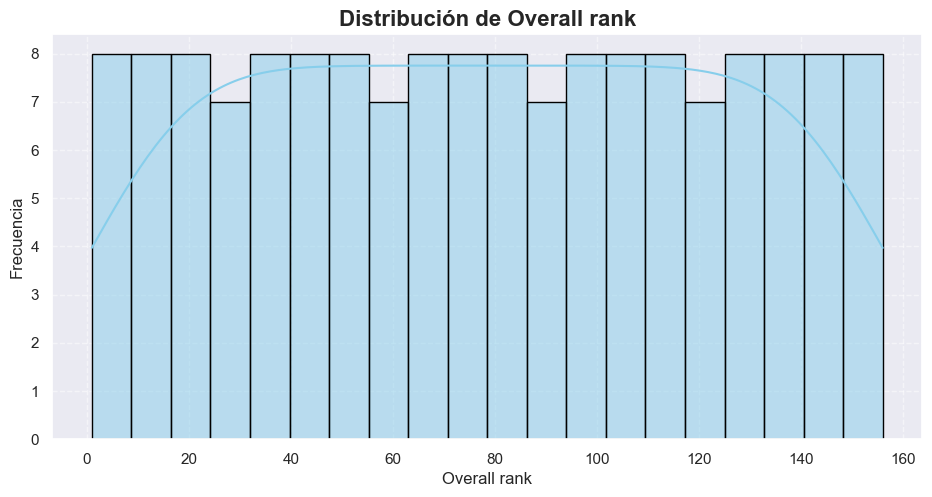

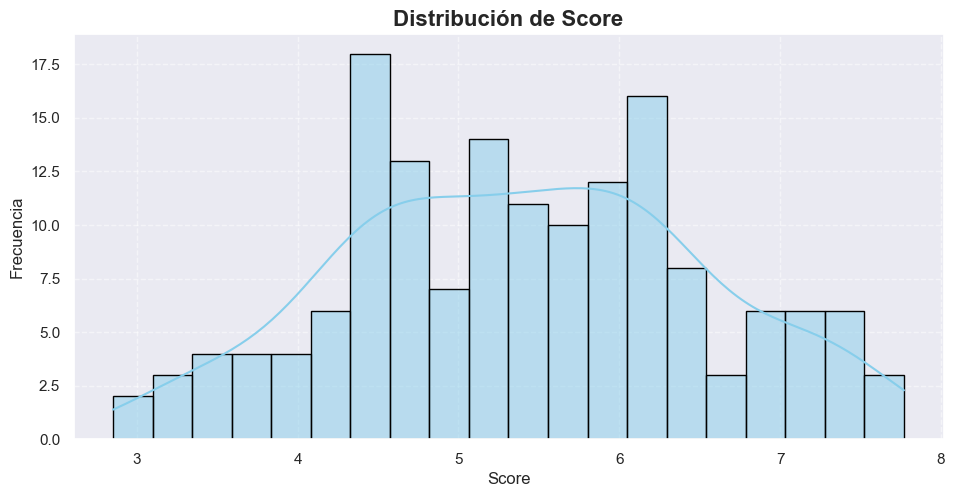

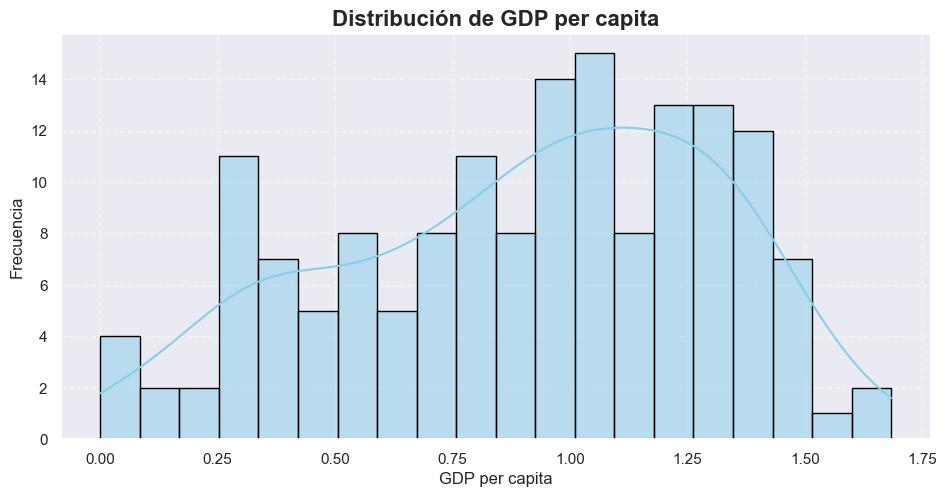

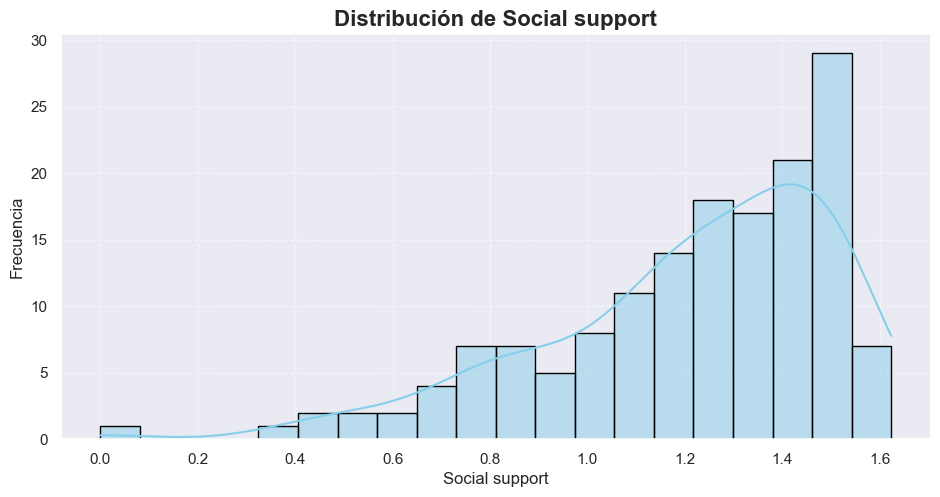

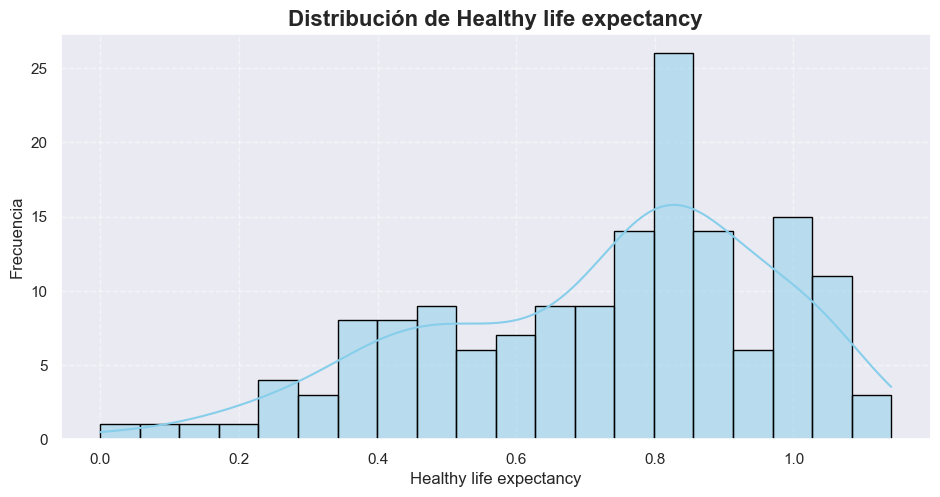

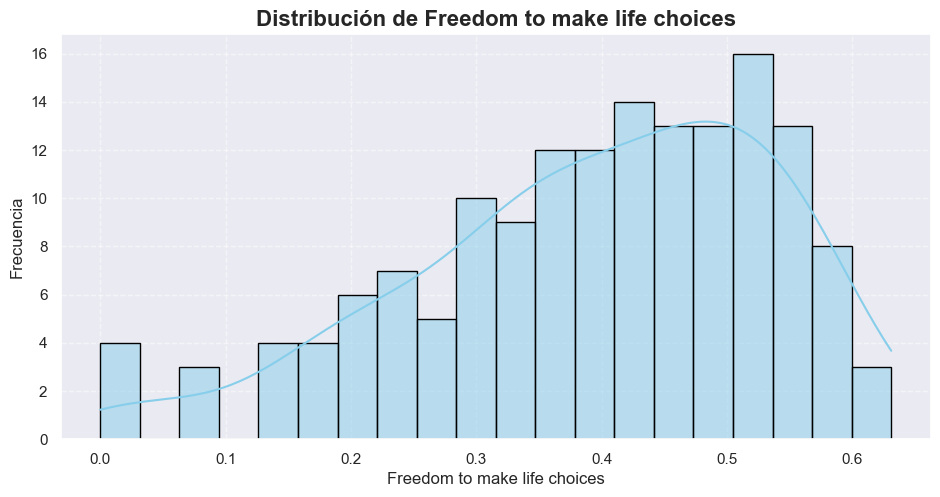

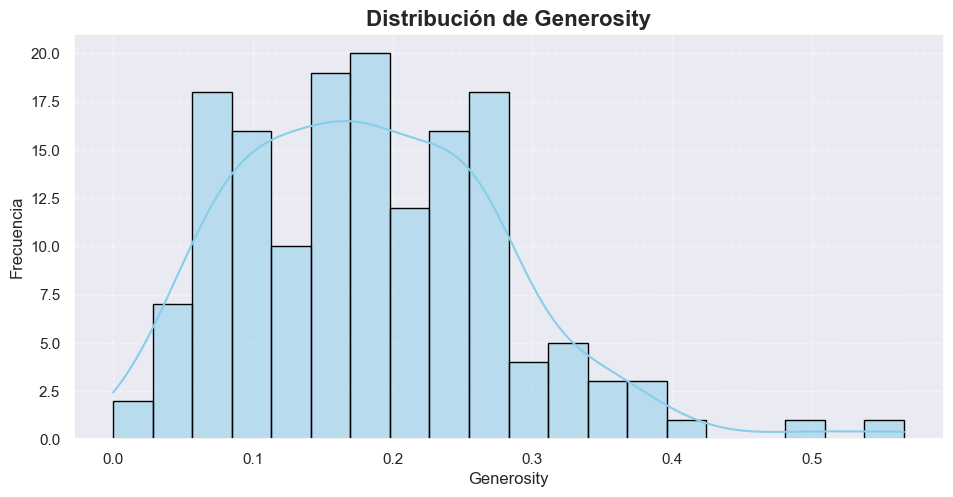

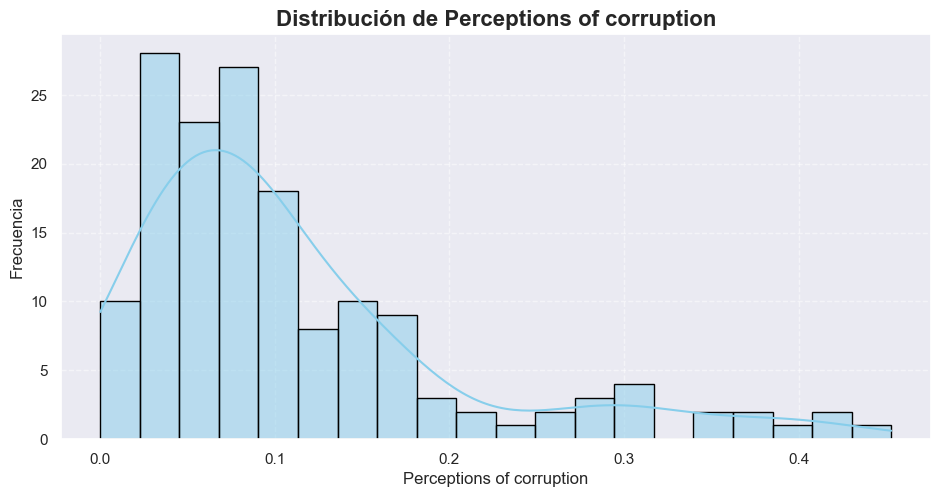

✔ PASO 8 (Análisis univariado) completado correctamente.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (10, 6)})

# -------------------------------------
#  Análisis de variables categóricas

categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        order = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=order, palette='viridis')
        plt.title(f'Conteo de categorías: {col}', fontsize=18, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Conteo')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()
else:
    print(f"{color.YELLOW}No se encontraron columnas categóricas para graficar en el análisis univariado.{color.END}")

# -------------------------------------
# Análisis de variables numéricas con histogramas y KDE

numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20, edgecolor='black')
    plt.title(f'Distribución de {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

print(f"{color.GREEN}✔ PASO 8 (Análisis univariado) completado correctamente.{color.END}")


In [ ]:
#PASO 9: Análisis Bivariado


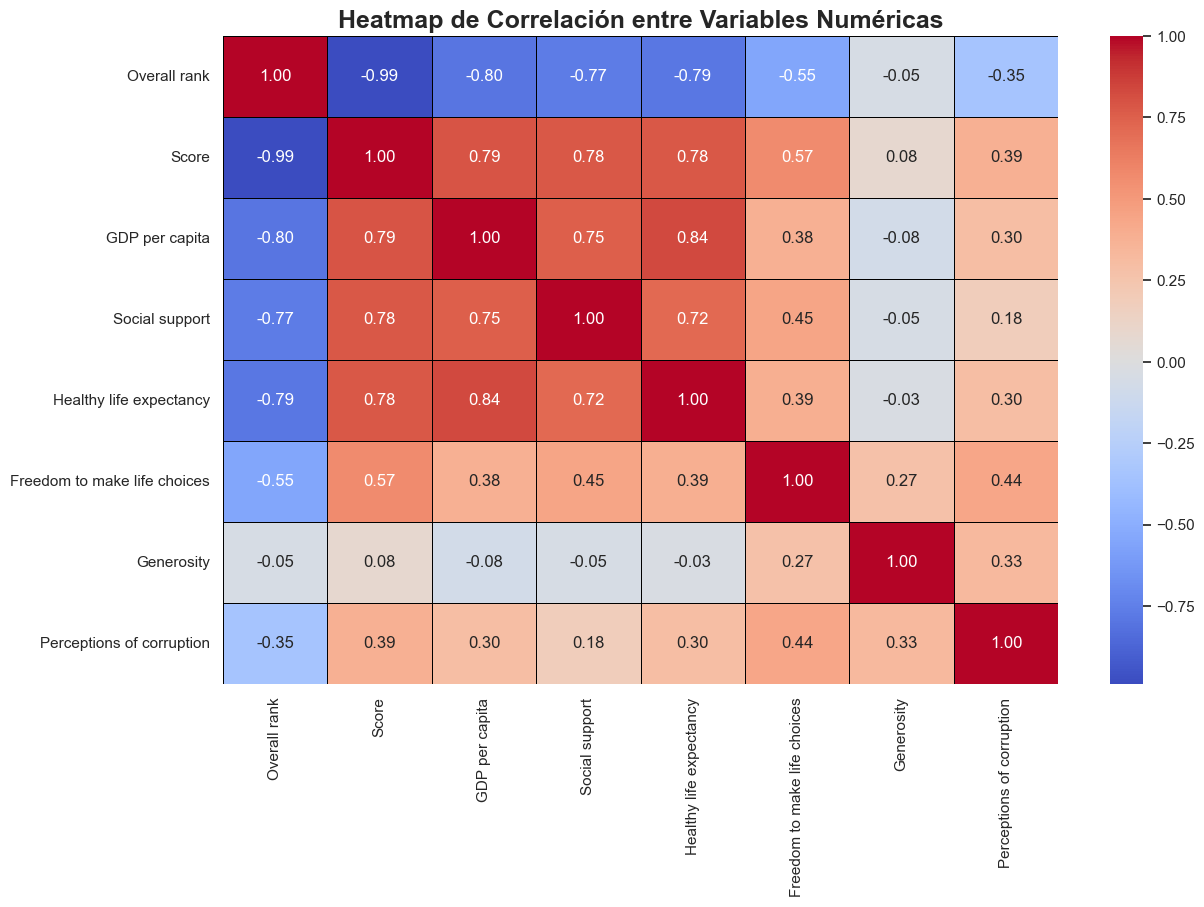

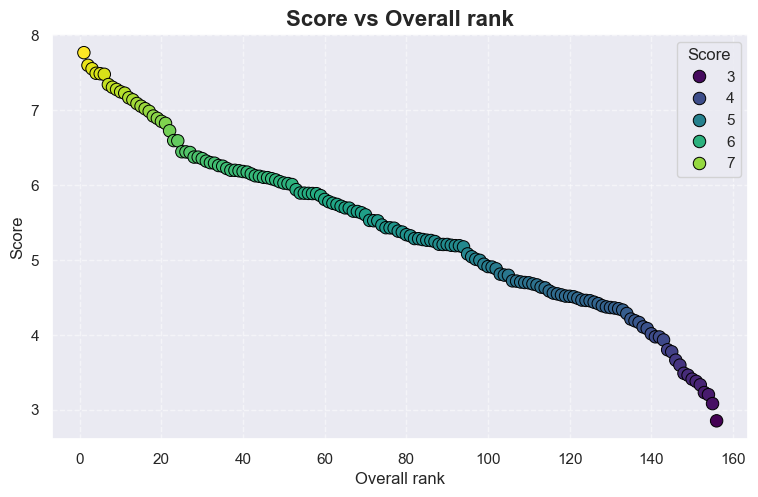

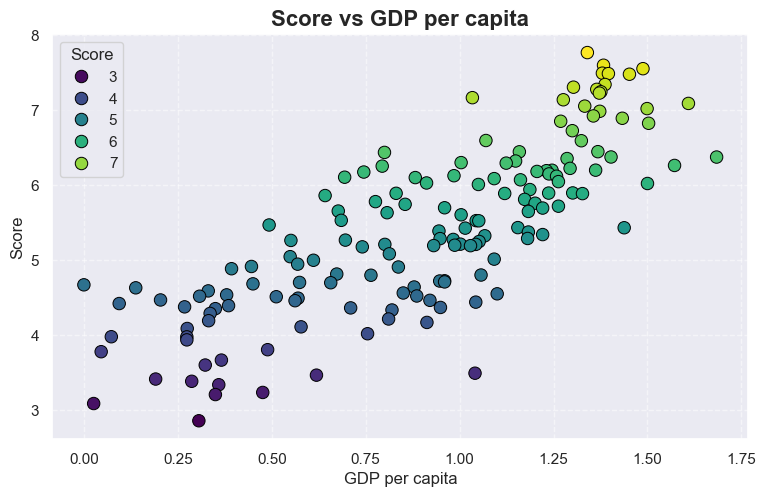

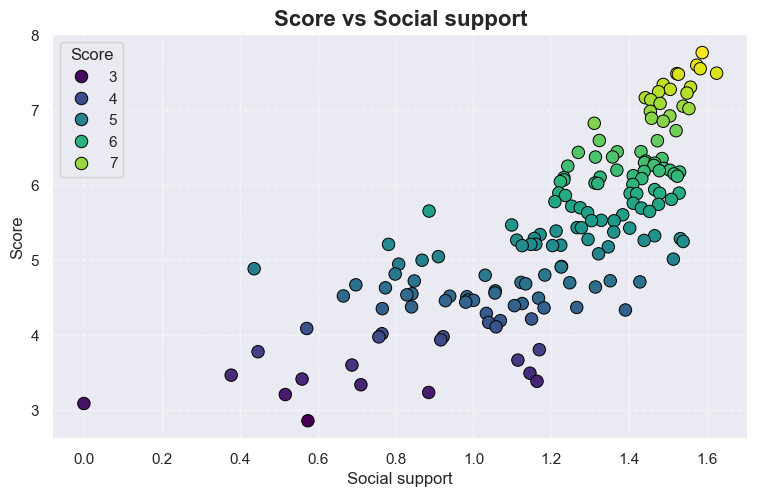

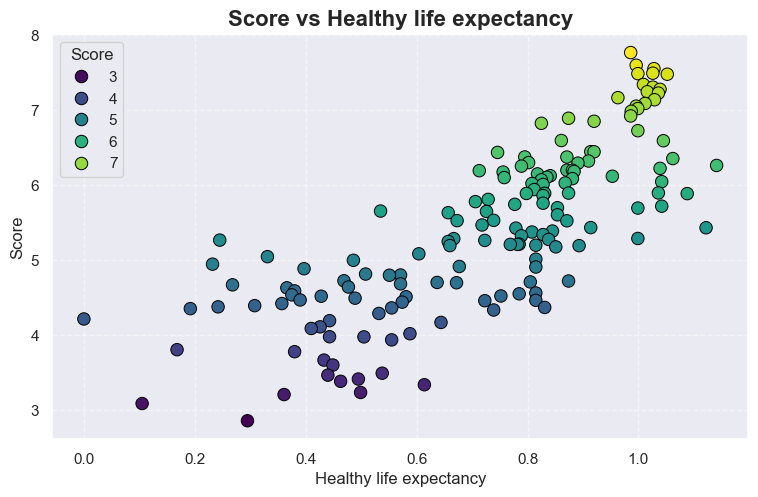

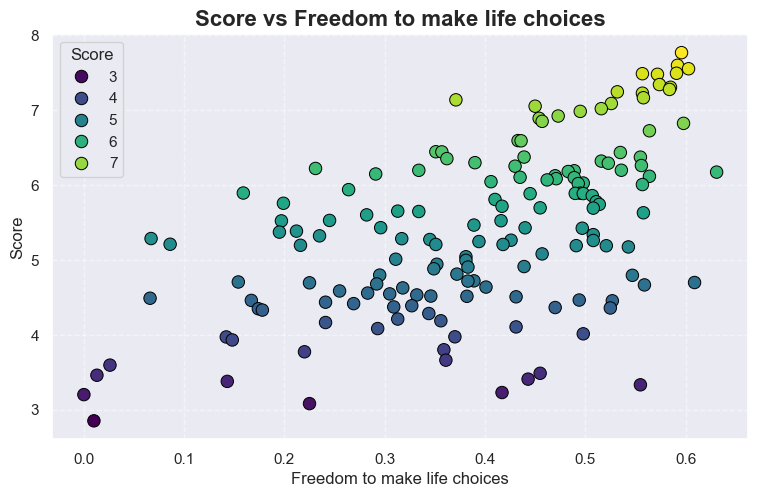

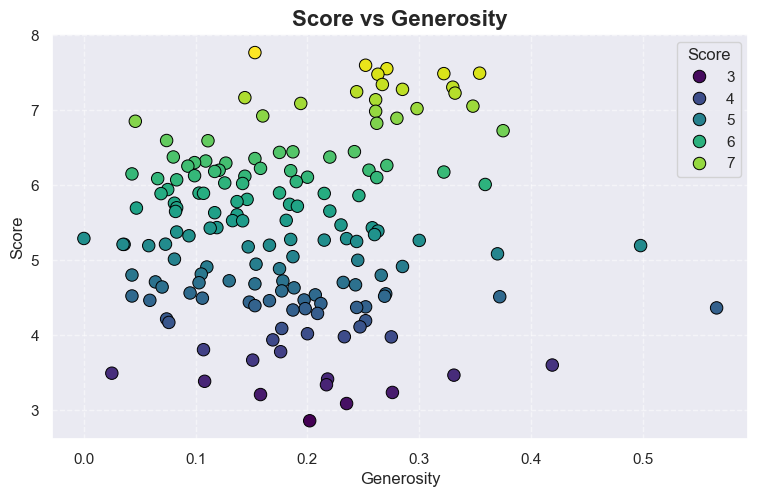

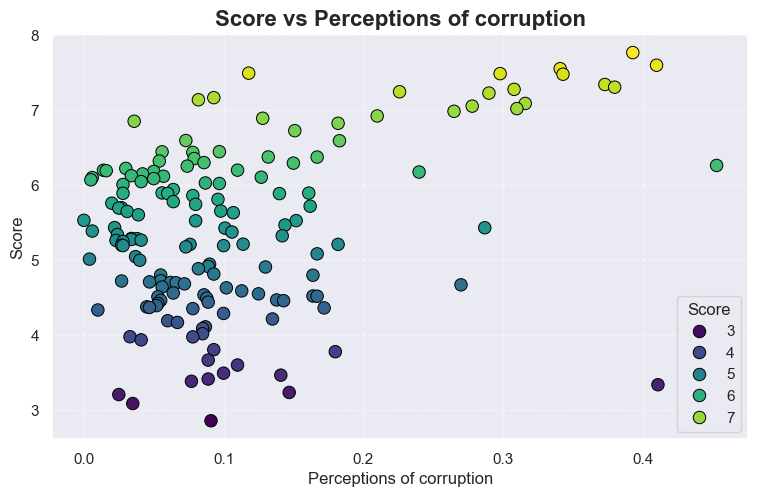

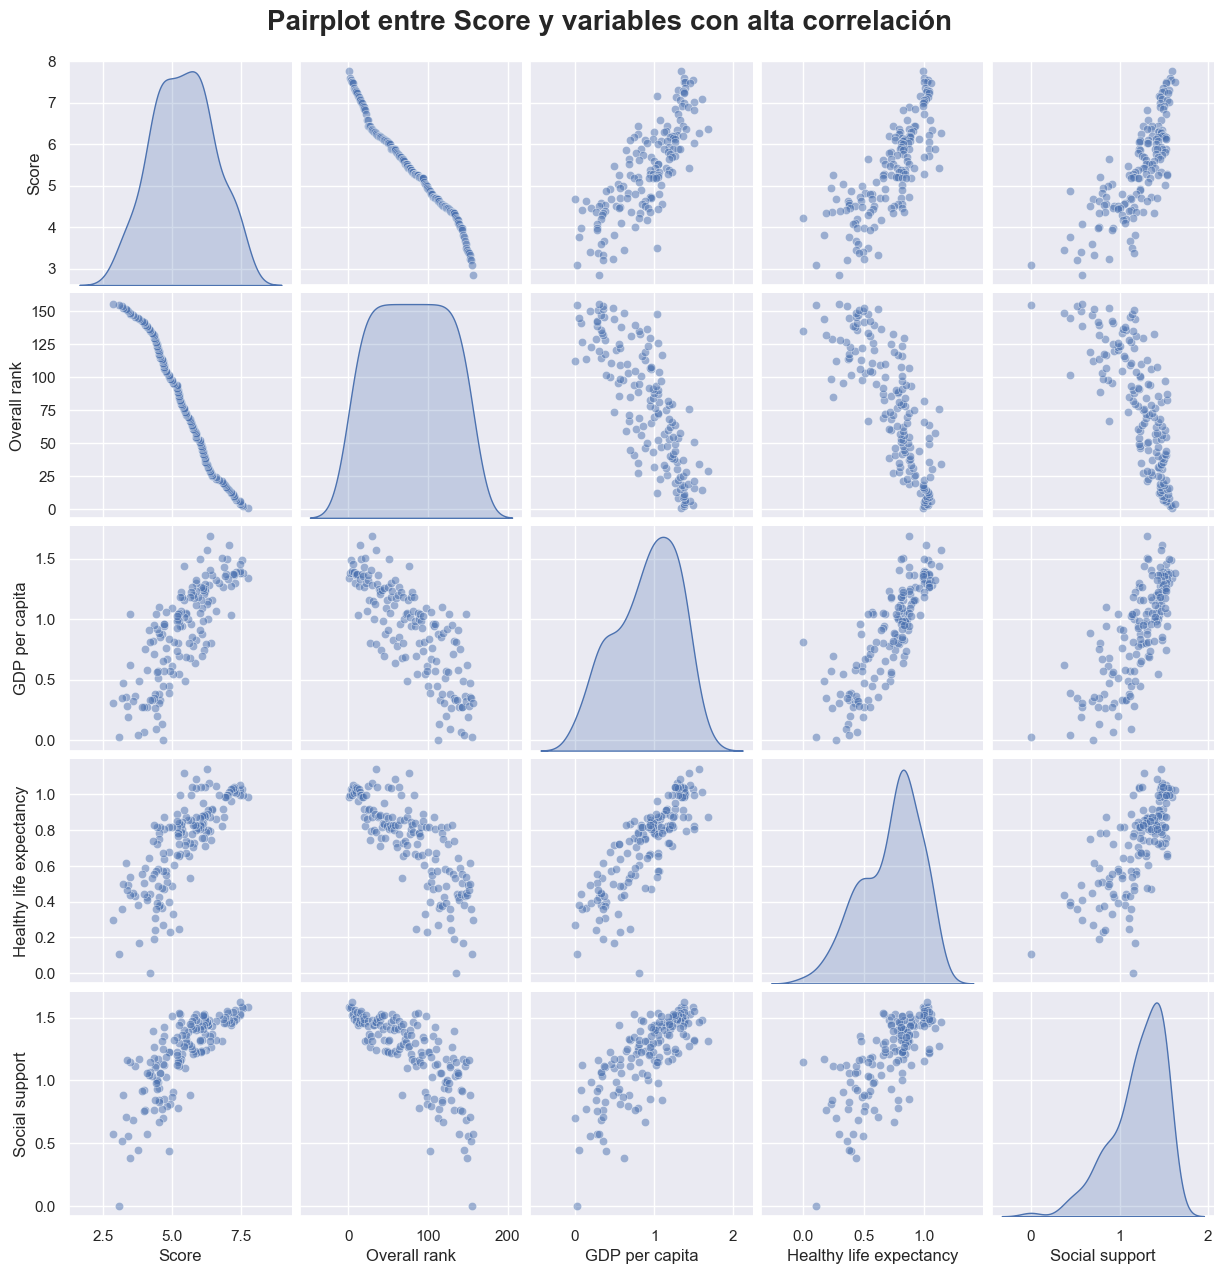

✔ PASO 9 (Análisis bivariado) completado correctamente.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (10, 6)})

# -------------------------------------
#  Heatmap de correlación

# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular matriz de correlación solo con numéricas
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Heatmap de Correlación entre Variables Numéricas', fontsize=18, fontweight='bold')
plt.show()

# -------------------------------------
# Scatterplots de Score vs variables relevantes

# Verificar nombre de la variable de felicidad
if 'Score' in df.columns:
    happiness_col = 'Score'
elif 'Happiness Score' in df.columns:
    happiness_col = 'Happiness Score'
else:
    happiness_col = numeric_cols[0]

# Graficar scatterplots de happiness_col contra otras variables
for col in numeric_cols:
    if col != happiness_col:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=col, y=happiness_col, hue=happiness_col, palette='viridis', s=80, edgecolor='black')
        plt.title(f'{happiness_col} vs {col}', fontsize=16, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel(happiness_col)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

# -------------------------------------
# Pairplot de variables numéricas principales

# Seleccionar las 4 variables con mayor correlación con la felicidad (sin incluir happiness_col)
correlations = df[numeric_cols].corr()[happiness_col].abs().sort_values(ascending=False)
top_features = correlations.drop(happiness_col).head(4).index.tolist()

# Incluir happiness_col para el pairplot
pairplot_cols = [happiness_col] + top_features

sns.pairplot(df[pairplot_cols], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle(f'Pairplot entre {happiness_col} y variables con alta correlación', fontsize=20, fontweight='bold', y=1.02)
plt.show()

print(f"{color.GREEN}✔ PASO 9 (Análisis bivariado) completado correctamente.{color.END}")


In [ ]:
#PASO 10: Análisis Multivariado


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

plt.style.use("fivethirtyeight")
sns.set(rc={"figure.figsize": (10, 7)})

# -------------------------------------
# Gráfico de dispersión 3D

# Seleccionar tres variables numéricas para graficar en 3D
numeric_cols = df.select_dtypes(include=['number']).columns

# Selección automática si no hay otras variables designadas
selected_columns = numeric_cols[:3] if len(numeric_cols) >= 3 else numeric_cols

if len(selected_columns) == 3:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(
        df[selected_columns[0]],
        df[selected_columns[1]],
        df[selected_columns[2]],
        c=df[selected_columns[2]],
        cmap='viridis',
        s=50,
        edgecolor='k'
    )

    ax.set_xlabel(selected_columns[0])
    ax.set_ylabel(selected_columns[1])
    ax.set_zlabel(selected_columns[2])
    ax.set_title('Multivariate Analysis: 3D Scatter Plot', fontsize=16, fontweight='bold')

    plt.show()
else:
    print(f"{color.YELLOW}No se encontraron tres columnas numéricas para graficar en 3D. Ajusta 'selected_columns'.{color.END}")

# -------------------------------------
#  Pairplot multivariado con hue categórico

# Buscar variable categórica para colorear
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    hue_col = categorical_cols[0]  # Tomar la primera categórica para ejemplo

    # Codificar si tiene demasiadas categorías
    if df[hue_col].nunique() > 15:
        df[hue_col] = LabelEncoder().fit_transform(df[hue_col].astype(str))

    # Limitar columnas a máximo 5 para claridad
    pairplot_cols = numeric_cols[:5] if len(numeric_cols) >= 5 else numeric_cols

    sns.pairplot(
        df[pairplot_cols.tolist() + [hue_col]],
        hue=hue_col,
        diag_kind='kde',
        plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'},
        corner=True
    )
    plt.suptitle(f'Pairplot Multivariado con hue={hue_col}', fontsize=20, fontweight='bold', y=1.02)
    plt.show()
else:
    print(f"{color.YELLOW}No se encontraron columnas categóricas para utilizar como hue. Se omite el pairplot multivariado.{color.END}")

print(f"{color.GREEN}✔ PASO 10 (Análisis multivariado) completado correctamente.{color.END}")
